# Wstęp do szeregów czasowych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

## Zadanie 1
Wczytaj dane `a10.csv` opisujący miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj *wykres sezonowy*, tzn. wykres wartości szeregu z podziałem na lata i miesiące,
- narysuj wykresy skrzynkowe z podziałem na lata i miesiące,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.

In [2]:
#funkcja do plotowania szeregów czasowych
def plot_time_series(t, val, title="", xlabel='Data', ylabel='Wartość', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(t, val, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [3]:
a10 = pd.read_csv('a10.csv', 
                 parse_dates=['date'], index_col='date')
#data to indeksy ramki danych, wartości w kolumnie

### Wykres wartości szeregu w zależności od czasu

In [4]:
a10

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [5]:
a10.values

array([[ 3.526591  ],
       [ 3.180891  ],
       [ 3.252221  ],
       [ 3.611003  ],
       [ 3.565869  ],
       [ 4.306371  ],
       [ 5.088335  ],
       [ 2.81452   ],
       [ 2.985811  ],
       [ 3.20478   ],
       [ 3.127578  ],
       [ 3.270523  ],
       [ 3.73785082],
       [ 3.55877609],
       [ 3.77720173],
       [ 3.92449042],
       [ 4.38653092],
       [ 5.81054917],
       [ 6.19206769],
       [ 3.45085699],
       [ 3.77230686],
       [ 3.7343029 ],
       [ 3.90539892],
       [ 4.04968714],
       [ 4.31556552],
       [ 4.56218455],
       [ 4.60866203],
       [ 4.66785129],
       [ 5.09384145],
       [ 7.1799622 ],
       [ 6.73147308],
       [ 3.84127758],
       [ 4.39407557],
       [ 4.07534073],
       [ 4.5406449 ],
       [ 4.64561508],
       [ 4.75260653],
       [ 5.35060467],
       [ 5.20445484],
       [ 5.3016513 ],
       [ 5.77374216],
       [ 6.20459348],
       [ 6.74948382],
       [ 4.21606735],
       [ 4.94934946],
       [ 4

In [6]:
a10.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

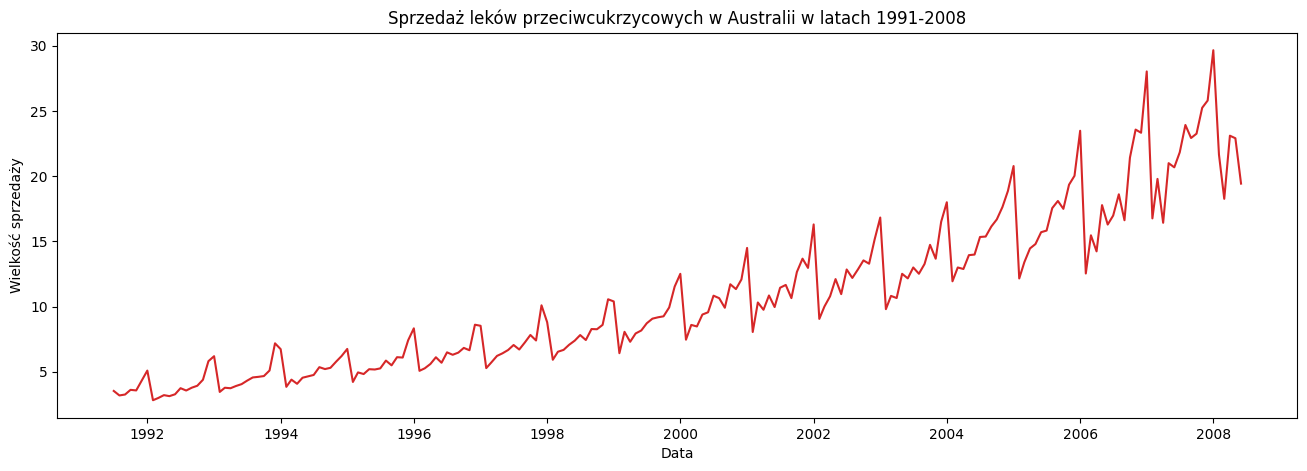

In [7]:
plot_time_series(a10.index, a10.values, title="Sprzedaż leków przeciwcukrzycowych w Australii w latach 1991-2008",
                 xlabel='Data', ylabel='Wielkość sprzedaży', dpi=100)

In [ ]:
# Wnioski: zadne z tych rzeczy nie sa pozadane w szeregu 
# skoki - sezonowosc 
# zmiana wariancji szeregu w czasie (wielkosc skokow rosnie)

### Wykres sezonowy

In [8]:
a10_series = a10.value
a10_series = a10_series.loc[(a10_series.index>='1992-01-01')&(a10_series.index<'2008-01-01')]
a10_series

date
1992-01-01     5.088335
1992-02-01     2.814520
1992-03-01     2.985811
1992-04-01     3.204780
1992-05-01     3.127578
                ...    
2007-08-01    23.930204
2007-09-01    22.930357
2007-10-01    23.263340
2007-11-01    25.250030
2007-12-01    25.806090
Name: value, Length: 192, dtype: float64

In [9]:
from pandas import Grouper

In [10]:
groups = a10_series.groupby(Grouper(freq = 'Y'))

C:\Users\Ola\AppData\Local\Temp\ipykernel_16952\292394239.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = a10_series.groupby(Grouper(freq = 'Y'))


In [11]:
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,5.088335,6.192068,6.731473,6.749484,8.329452,8.524471,8.798513,10.391416,12.511462,14.497581,16.300269,16.828350,18.003768,20.778723,23.486694,28.038383
1,2.814520,3.450857,3.841278,4.216067,5.069796,5.277918,5.918261,6.421535,7.457199,8.049275,9.053485,9.800215,11.938030,12.154552,12.536987,16.763869
2,2.985811,3.772307,4.394076,4.949349,5.262557,5.714303,6.534493,8.062619,8.591191,10.312891,10.002449,10.816994,12.997900,13.402392,15.467018,19.792754
3,3.204780,3.734303,4.075341,4.823045,5.597126,6.214529,6.675736,7.297739,8.474000,9.753358,10.788750,10.654223,12.882645,14.459239,14.233539,16.427305
4,3.127578,3.905399,4.540645,5.194754,6.110296,6.411929,7.064201,7.936916,9.386803,10.850382,12.106705,12.512323,13.943447,14.795102,17.783058,21.000742
5,3.270523,4.049687,4.645615,5.170787,5.689161,6.667716,7.383381,8.165323,9.560399,9.961719,10.954101,12.161210,13.989472,15.705248,16.291602,20.681002
6,3.737851,4.315566,4.752607,5.256742,6.486849,7.050831,7.813496,8.717420,10.834295,11.443601,12.844566,12.998046,15.339097,15.829550,16.980282,21.834890
7,3.558776,4.562185,5.350605,5.855277,6.300569,6.704919,7.431892,9.070964,10.643751,11.659239,12.196500,12.517276,15.370764,17.554701,18.612189,23.930204
8,3.777202,4.608662,5.204455,5.490729,6.467476,7.250988,8.275117,9.177113,9.908162,10.647060,12.854748,13.268658,16.142005,18.100864,16.623343,22.930357
9,3.924490,4.667851,5.301651,6.115293,6.828629,7.819733,8.260441,9.251887,11.710041,12.652134,13.542004,14.733622,16.685754,17.496668,21.430241,23.263340


<Axes: >

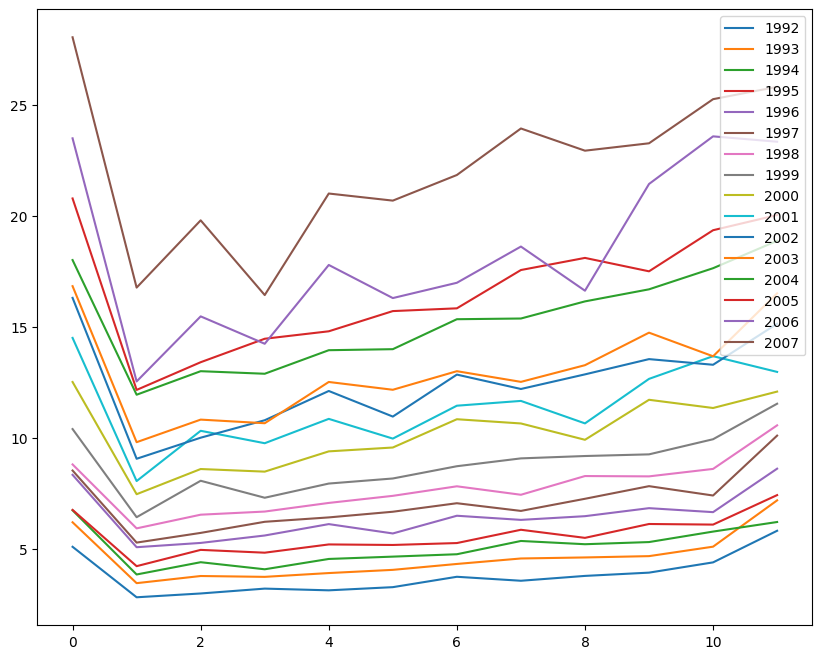

In [12]:
years.plot(figsize = (10,8))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

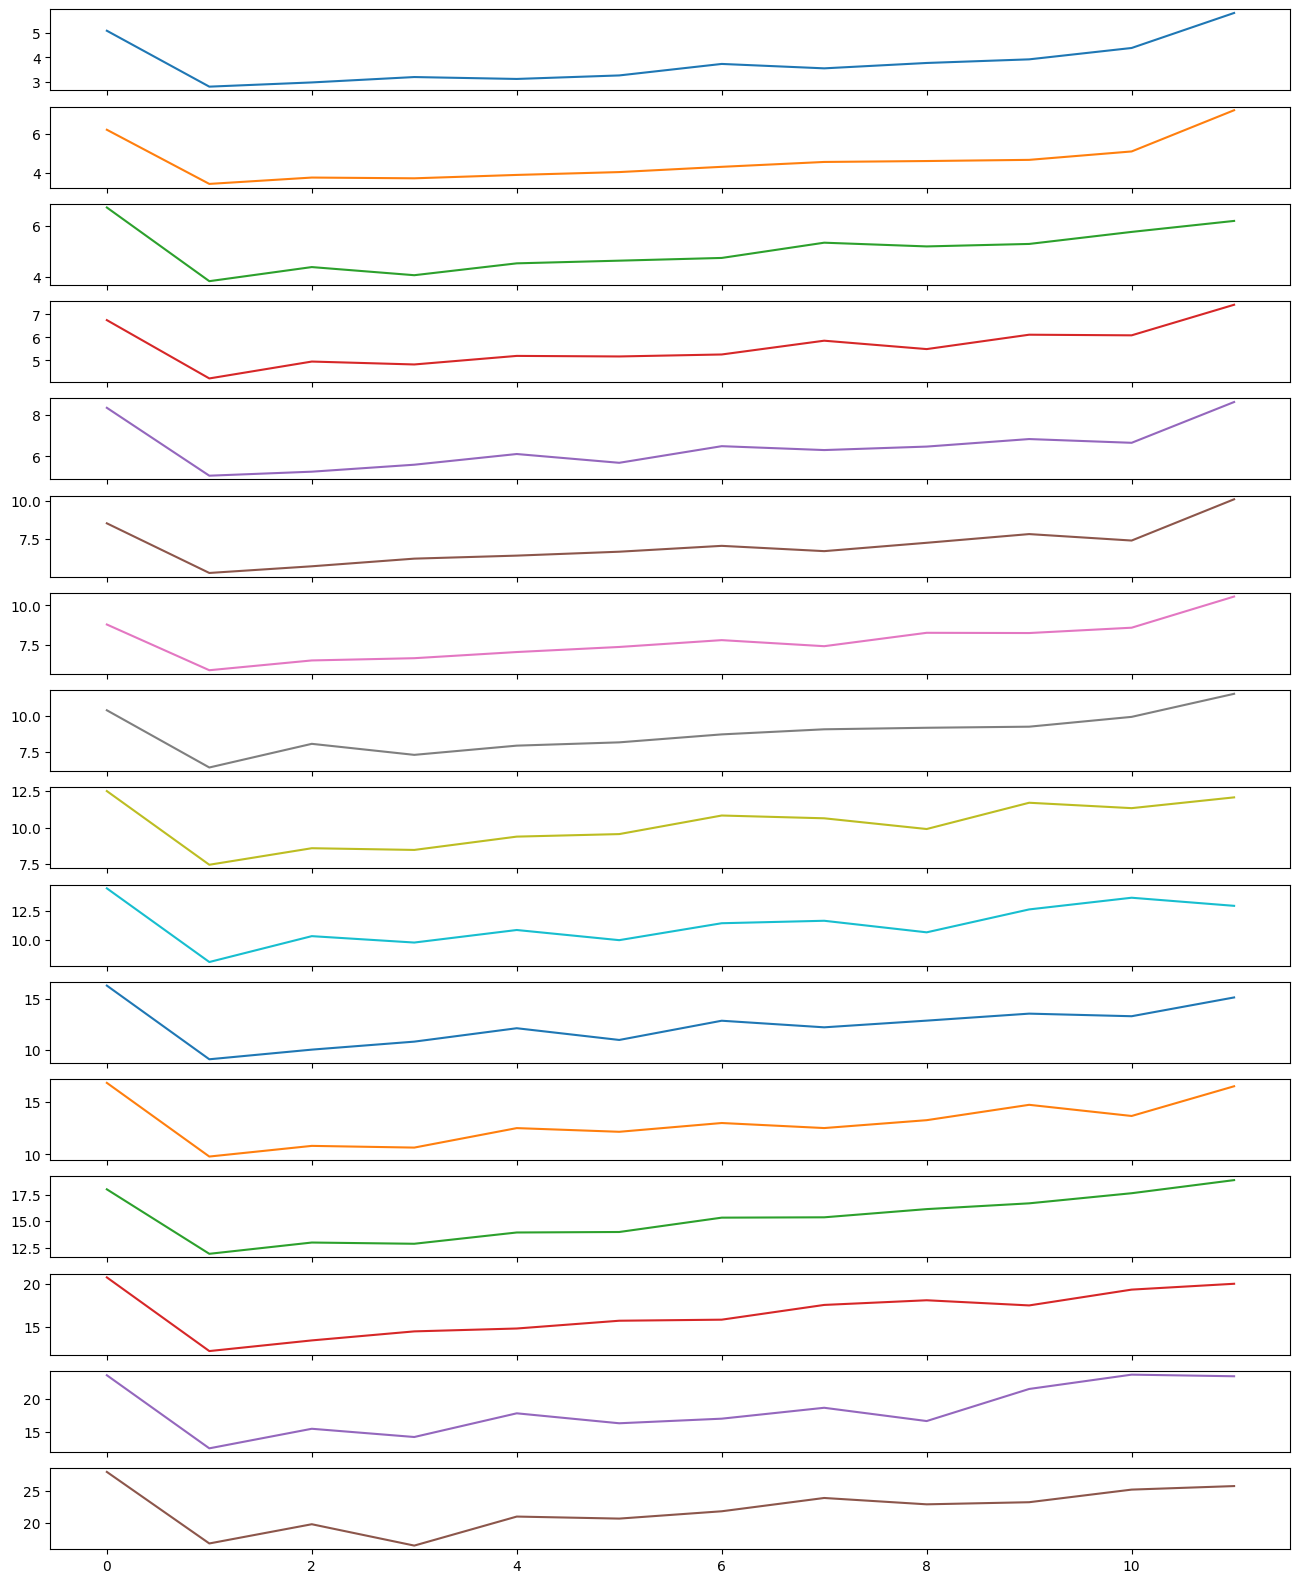

In [13]:
years.plot(subplots = True,legend = False,figsize = (16,20))

In [ ]:
# sezonowosc czesto daje sie odczytac 
# periodogram - apropo sezonowosci - sprawdza wartosc sezonu 
# rosnacy trend

### Wykresy skrzynkowe

- roczne (trend)
- miesięczne (sezonowość)

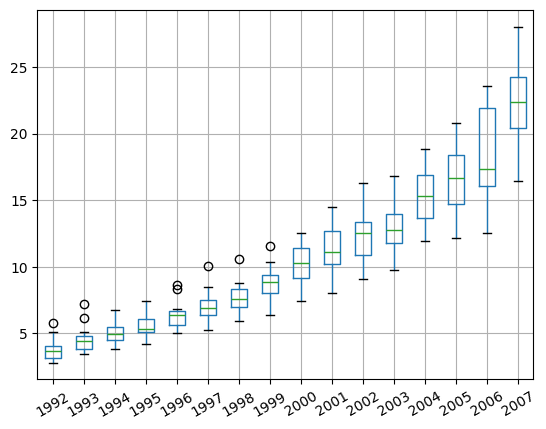

In [14]:
years.boxplot()
plt.xticks(rotation = 30)
plt.show()

In [ ]:
# widac wzrost
# wariancja wartosci rosnie w czasie
# 

In [15]:
months = years.T
months

,0,1,2,3,4,5,6,7,8,9,10,11
1992,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490,4.386531,5.810549
1993,6.192068,3.450857,3.772307,3.734303,3.905399,4.049687,4.315566,4.562185,4.608662,4.667851,5.093841,7.179962
1994,6.731473,3.841278,4.394076,4.075341,4.540645,4.645615,4.752607,5.350605,5.204455,5.301651,5.773742,6.204593
1995,6.749484,4.216067,4.949349,4.823045,5.194754,5.170787,5.256742,5.855277,5.490729,6.115293,6.088473,7.416598
1996,8.329452,5.069796,5.262557,5.597126,6.110296,5.689161,6.486849,6.300569,6.467476,6.828629,6.649078,8.606937
1997,8.524471,5.277918,5.714303,6.214529,6.411929,6.667716,7.050831,6.704919,7.250988,7.819733,7.398101,10.096233
1998,8.798513,5.918261,6.534493,6.675736,7.064201,7.383381,7.813496,7.431892,8.275117,8.260441,8.596156,10.558939
1999,10.391416,6.421535,8.062619,7.297739,7.936916,8.165323,8.717420,9.070964,9.177113,9.251887,9.933136,11.532974
2000,12.511462,7.457199,8.591191,8.474000,9.386803,9.560399,10.834295,10.643751,9.908162,11.710041,11.340151,12.079132
2001,14.497581,8.049275,10.312891,9.753358,10.850382,9.961719,11.443601,11.659239,10.647060,12.652134,13.674466,12.965735


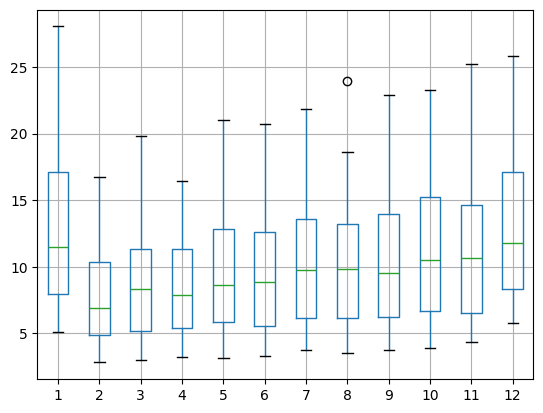

In [16]:
months.boxplot()
plt.xticks(ticks = np.arange(1,13),labels = np.arange(1,13))
plt.show()

In [17]:
a10_series = pd.DataFrame(a10_series)

In [18]:
a10_series['year'] = [d.year for d in a10_series.index]
a10_series['month'] = [d.strftime('%b') for d in a10_series.index]
a10_series

,value,year,month
date,,,
1992-01-01,5.088335,1992,Jan
1992-02-01,2.814520,1992,Feb
1992-03-01,2.985811,1992,Mar
1992-04-01,3.204780,1992,Apr
1992-05-01,3.127578,1992,May
...,...,...,...
2007-08-01,23.930204,2007,Aug
2007-09-01,22.930357,2007,Sep
2007-10-01,23.263340,2007,Oct


C:\Users\Ola\AppData\Local\Temp\ipykernel_16952\3300460427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=a10_series, ax=axes[0], palette='cubehelix').set(
C:\Users\Ola\AppData\Local\Temp\ipykernel_16952\3300460427.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)


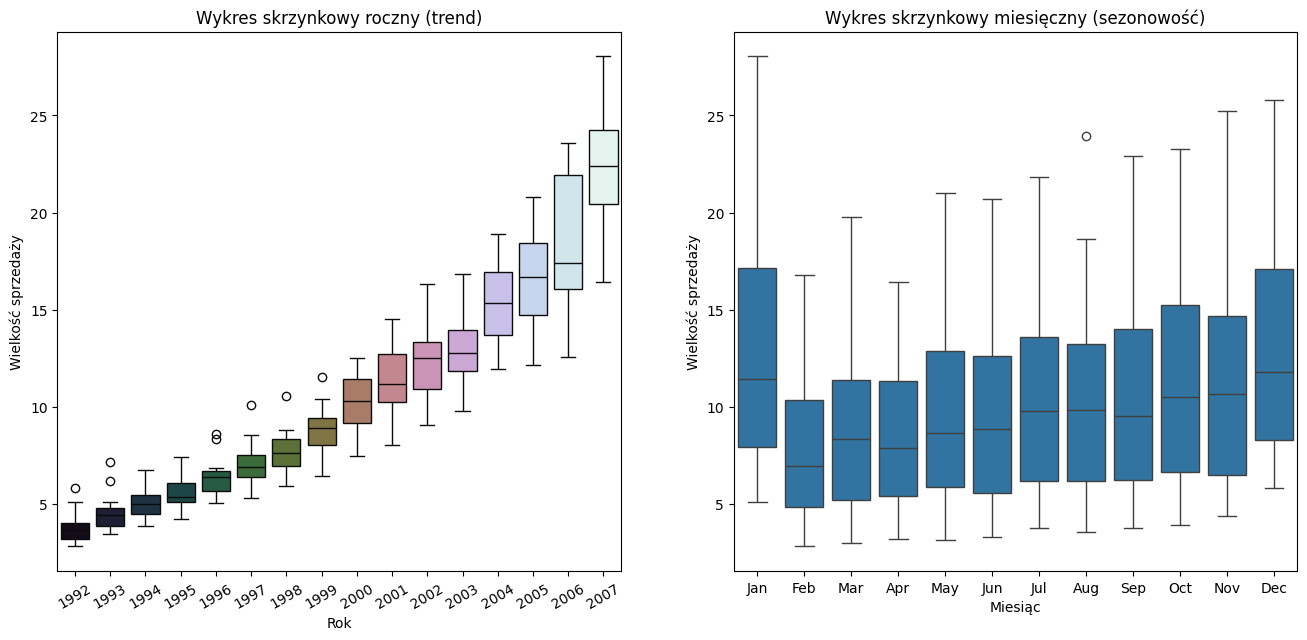

In [19]:
#wykresy skrzynkowe dla poszczególnych lat i miesięcy
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='year', y='value', data=a10_series, ax=axes[0], palette='cubehelix').set(
    xlabel='Rok',
    ylabel='Wielkość sprzedaży'
)

sns.boxplot(x='month', y='value', data=a10_series, ax=axes[1]).set(
    xlabel='Miesiąc',
    ylabel='Wielkość sprzedaży'
)

axes[0].set_title('Wykres skrzynkowy roczny (trend)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy miesięczny (sezonowość)')
plt.show()

### Wykres autokorelacji

In [20]:
from pandas.plotting import autocorrelation_plot

## Zadanie 1a
Zaimplementuj własną funkcję do wyznaczenia autokorelacji dowolnego szeregu. 
Sporządź wykres jak powyżej.

**Przypomnienie**:

**Autokowariancja**
\begin{equation*}
    \hat{\gamma}(h) = \frac{1}{n} \sum_{i=1}^{n-h}(y_i - \overline{y})(y_{i+h} - \overline{y})
\end{equation*}

**Autokorelacja**
\begin{equation*}
    \text{ACF}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
\end{equation*}

In [ ]:
# analiza szeregu czasowego 
# mozemy miec np. zaleznosci miedzy obserwacja w chwili styczen 98 a styczen 97 
# 

In [21]:
#funkcja licząca gamma_z_daszkiem(h)
def Cov(y, h):
   n = len(y)
   y_mean = np.mean(y)
   cov = np.sum([(y[i] - y_mean) * (y[i+h] - y_mean) for i in range(n - h)])
   cov /= n
   return cov
#gamma_z_daszkiem(h)/gamma_z_daszkiem(0)
def ACF(y, h):
   acf_h = Cov(y, h) / Cov(y, 0)
   return acf_h
#wykres autokorelacji
def autocorrelation_plot2(series, lag=100, min_lag=1):
   h_range = range(min_lag, lag + 1)
   acf = [ACF(series, i) for i in h_range]
    
   plt.plot(h_range, acf)
   plt.hlines(xmin=min_lag, xmax=lag, y=0)
   #pas to kwantyl z rozkładu normalnego na poziomie 0.975 dzielone przez pierwiastek długości szeregu
   pufn = 1.96 / np.sqrt(len(series))
   plt.hlines(xmin=min_lag, xmax=lag, y=pufn,linestyles='dashed')
   plt.hlines(xmin=min_lag, xmax=lag, y=-pufn,linestyles='dashed')
   plt.xlim([min_lag, lag])
   plt.xlabel("Lag")
   plt.ylim([-1, 1])
   plt.ylabel("Autocorrelation")

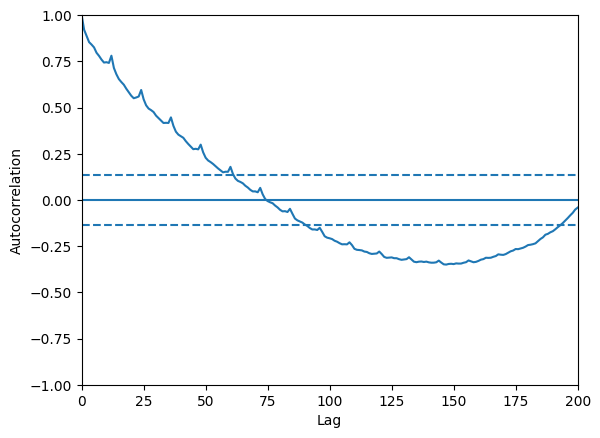

In [22]:
autocorrelation_plot2(a10.value.tolist(),lag=200,min_lag = 0)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

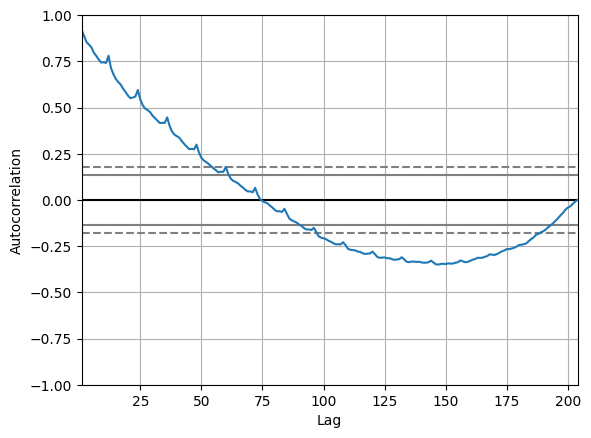

In [23]:
# a tu wbudowana funkcja, nie trzeba samemu definiowac tej funkcji 
autocorrelation_plot(a10.value.tolist())

In [ ]:
# Wnioski 
# jak idzie luk to mamy i trend i sezonowosc
# jakby byla sama sezonowowsc to by wykres szedl gora dol 
# jak by byl sam trend to opadaloby stabilnie bez zakretow 
# gdyby byl stacjonarny stabilny, to bylby w tym pasie 
# tutaj mamy zarowno i trend i sezonowosc 

# jak opada to jestr trend ale nie wiemy czy trend jest rosnacy czy malejacy
# garbki ktore sie pojawiaja to tez "dziwne", prawdopodobnie wynika z rosnacej warinacji 

In [ ]:
# zeby wiedziec na pewno co i jak to powinno sie patrzec tez na wizualizacje szeregu

### Wykres zależności obserwacji szeregu od opóźnień

Wykres zależności obserwacji szeregu od opóźnień zwykle służy do sprawdzania autokorelacji. Jeśli na wykresie rozproszenia zauważalny jest jakikolwiek wzorzec, wówczas możemy sądzić, że szereg jest autoskorelowany. Jeśli punkty układają się w sposób losowy, wówczas będzie przypadkowym *białym szumem*.

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

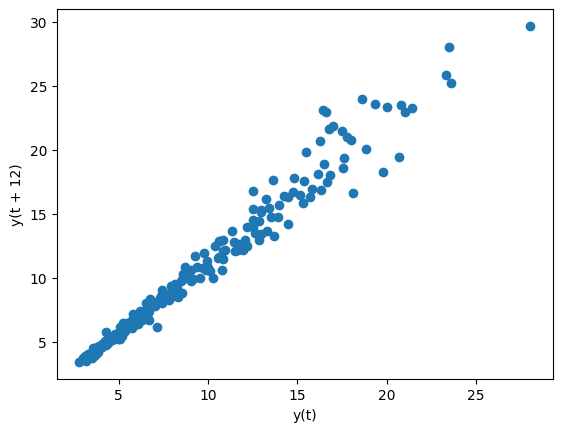

In [24]:
pd.plotting.lag_plot(a10.value,lag = 12)

## Zadanie 2

Wczytaj dane `daily-min-temperatures.csv` opisujący minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj wykres sezonowy, tzn. wykres wartości szeregu z podziałem na miesiące i dni,
- narysuj wykresy skrzynkowe z podziałem na miesiące i dni,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.

In [25]:
daily_temp = pd.read_csv('daily-min-temperatures.csv', parse_dates=['Date'], index_col='Date')
daily_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


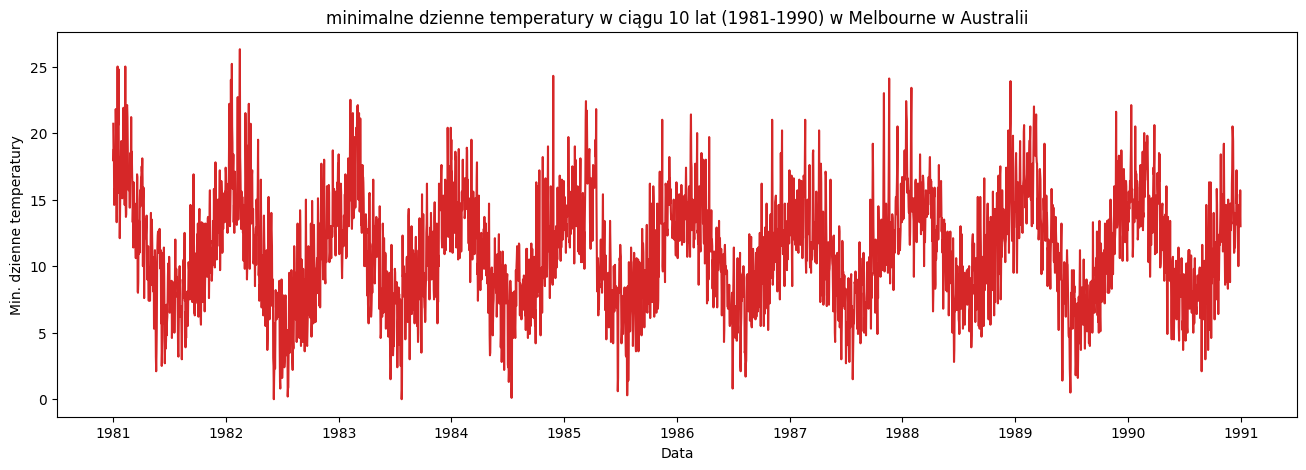

In [26]:
# 1. Narysuj wykres wartości szeregu w zależności od czasu,
plot_time_series(daily_temp.index, daily_temp.values, title="minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii",
                 xlabel='Data', ylabel='Min. dzienne temperatury', dpi=100)

In [ ]:
# sezonowosc (zima cieplej, latem chlodniej) 
# nie widac trendu 
# wariacja wydaje sie byc stabilna


In [35]:
# 2. Narysuj wykres sezonowy, tzn. wykres wartości szeregu z podziałem na miesiące i dni,
groups = daily_temp.Temp.groupby(Grouper(freq = 'Y'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years

C:\Users\Ola\AppData\Local\Temp\ipykernel_16952\268807274.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = daily_temp.Temp.groupby(Grouper(freq = 'Y'))


,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


In [ ]:
# Sezonowosc jest, wariancja jest stabilna


ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

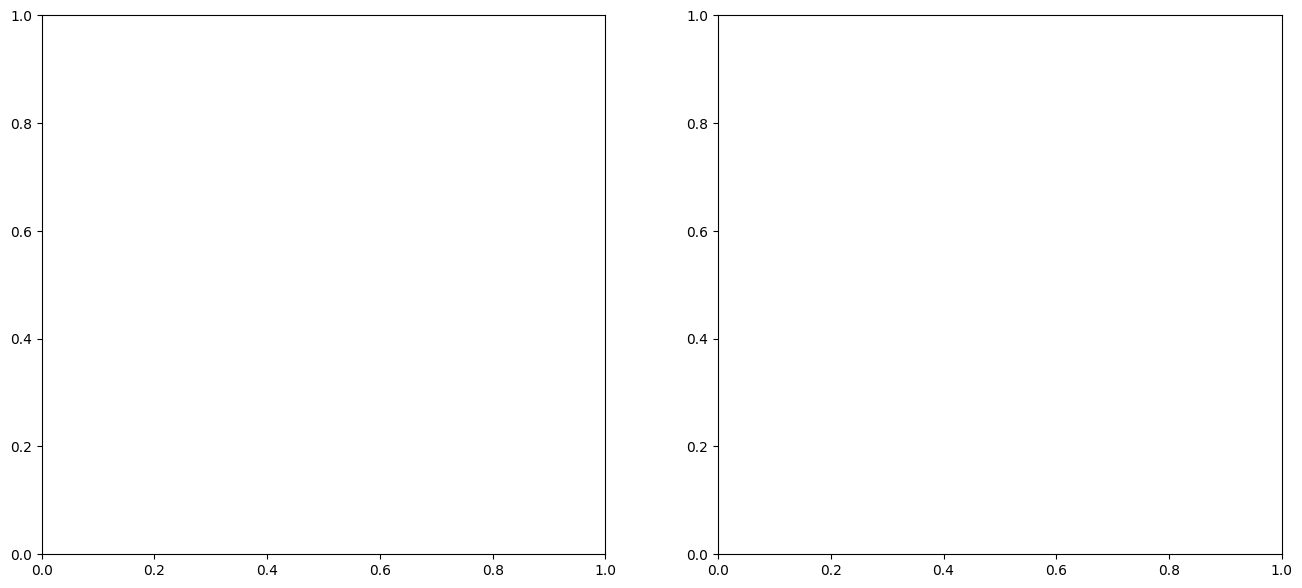

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.boxplot(x='year', y='Temp', data=daily_temp, ax=axes[0]).set(
    xlabel='Rok',
    ylabel='Temperatura'
)
sns.boxplot(x='month', y='Temp', data=daily_temp, ax=axes[1]).set(
    xlabel='Miesiąc',
    ylabel='Temperatura'
)
axes[0].set_title('Wykres skrzynkowy roczny (trend)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy miesięczny (sezonowość)')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

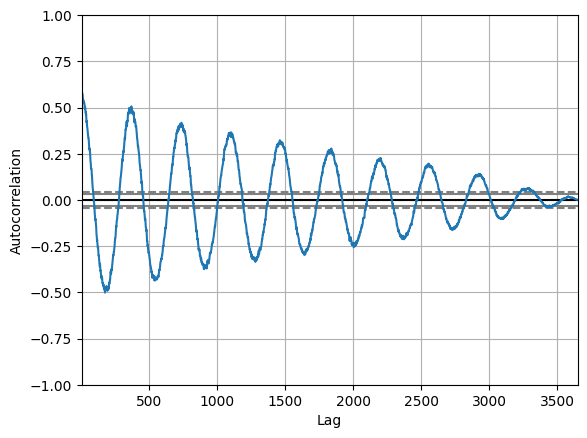

In [34]:
autocorrelation_plot(daily_temp.Temp.tolist())

In [ ]:
# nie ma trendu 
# typowy wykres dla szeregu z seznowoscia
# do momentu lag/4 to sa istotne 
# jak mam szereg dlugosci 50, to interesuje mnie pierwsze50/4 korelacji (to jest najbardziej wiarygodne) lub jak jest wiecej to pierwiastek z dlugosci

(0.0, 60.0)

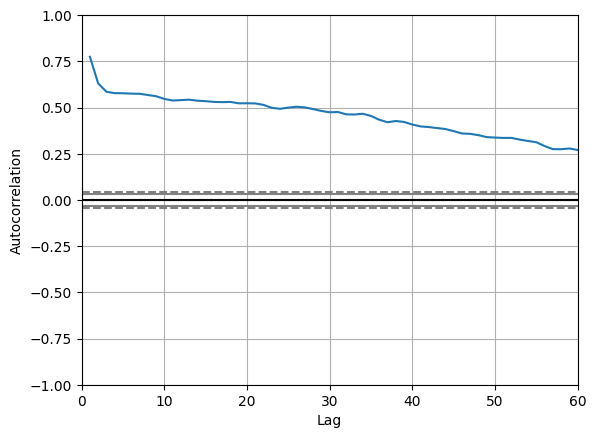

In [37]:
autocorrelation_plot(daily_temp.Temp.tolist()).set_xlim([0,60])
# przedzial ktory jest istotny ale! to stosujemy przy szeregu stacjonarnytm

## Zadanie 3

Wczytaj dane `daily-total-female-births.csv` przedstawiający całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj wykresy skrzynkowe z podziałem na miesiące i dni,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.


In [40]:
daily_birth = pd.read_csv('daily-total-female-births.csv', 
                 parse_dates=['Date'], index_col='Date')

daily_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


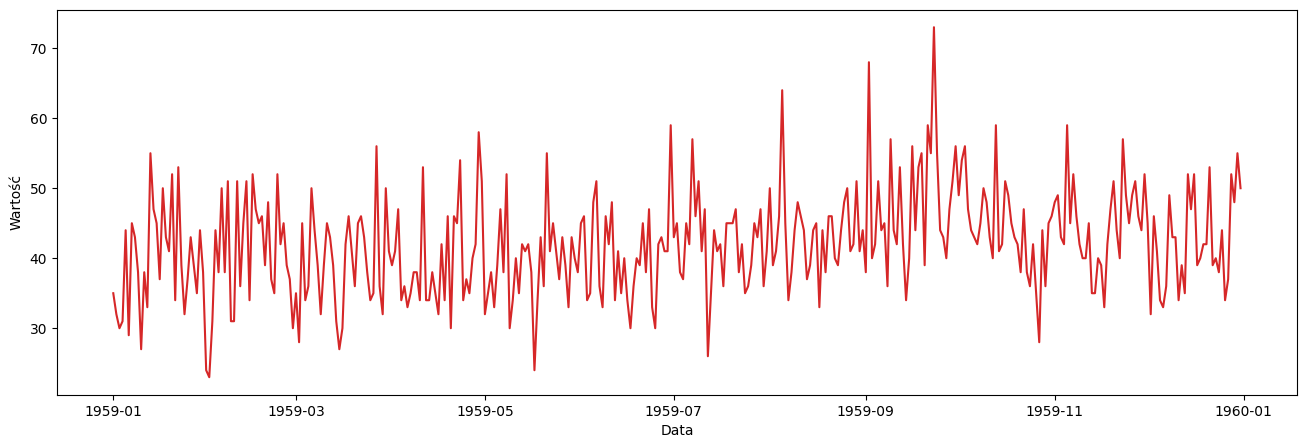

In [42]:
# 1. Narysuj wykres wartości szeregu w zależności od czasu,
plot_time_series(daily_birth.index, daily_birth.values)

In [ ]:
# stabilne jezeli chodzi o srednia 
# stacjonarny = regularnosc


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

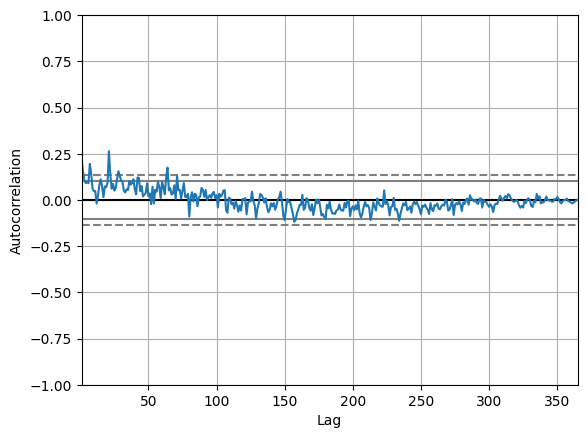

In [44]:
autocorrelation_plot(daily_birth.Births.tolist())

In [ ]:
# utrzymuje sie wewntrz pasa - mamy wykres stacjonarny 

In [46]:
np.sqrt(len(daily_birth))

np.float64(19.1049731745428)

(0.0, 20.0)

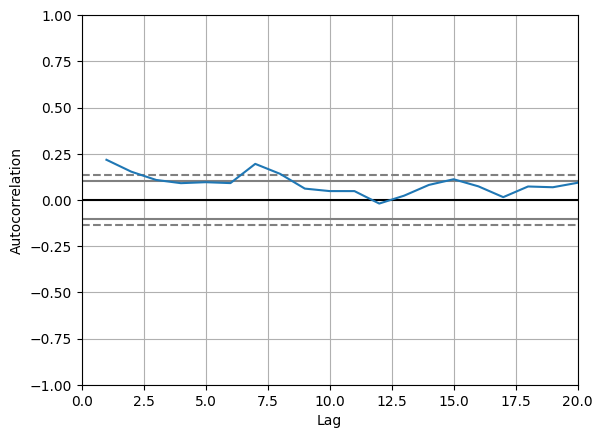

In [47]:
# ograniczamy wykres do 20 , bo te sa istotne 
autocorrelation_plot(daily_birth.Births.tolist()).set_xlim([0,20])

In [ ]:
# obsewujmey gdzie wyszo ostatnie wyjscie poza pas - widzimy ze w 7, reszta siedzi w pasie
# najlepiej by bylo w takim razie zamodelowac szereg, 
# ktory uwzglednia ze miedzy obserwacja a obserwacja oddalona o 7 jest jakas zaleznosc >>> ARMA potem 
